In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
Survey = pd.read_csv('ACME-HappinessSurvey2020.csv')
#As long as my notebook path lies within the same location as my Data file pathm I'm OK! Otherwise i need to specify CSV path.

In [12]:
Survey.info()
#7 columns in total, 126 entries for each, no null values, data seems OK!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


<Axes: xlabel='Y', ylabel='count'>

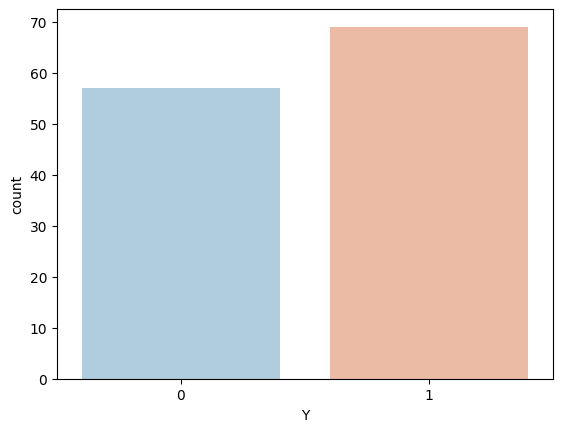

In [13]:
sns.countplot(x= Survey['Y'] , data = Survey , palette = 'RdBu_r')

<Axes: >

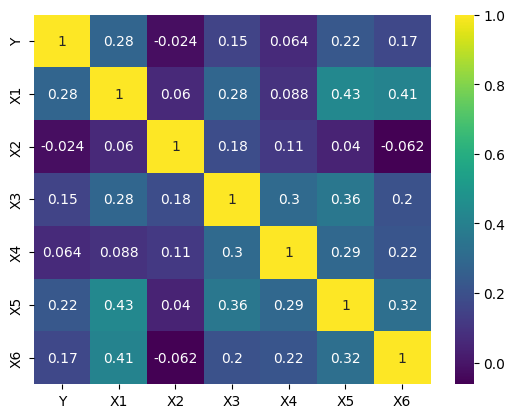

In [14]:
sns.heatmap(Survey.corr() , cmap = 'viridis', annot = True )

<Axes: >

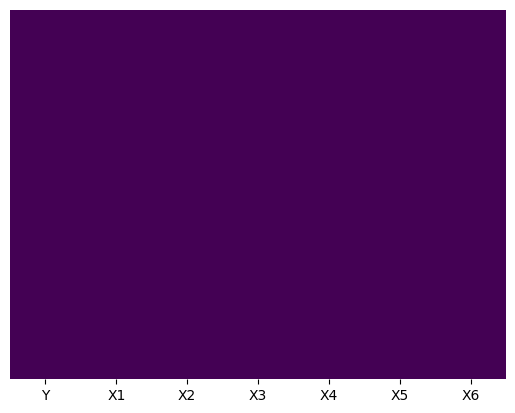

In [15]:
sns.heatmap(Survey.isnull() , yticklabels = False , cbar = False, cmap = 'viridis')
#No nall data

In [16]:
#Should all features be in numeric form?
#What are types of Logistics Regression?
#I understand that this is a "BINARY Clssification" Problem which can be solved using Supervised Learning -> Classification -> Logistics Regression
#Since Data is being classified into two categories (Happy vs Unhappy). How about Multi Classification?
#Should i be using logistics regression, or Linear Regression (Doesn't Y here depend on X1-X5?) 
#My assumption is Logistic Regression Since Y Can take only Discreat Values (0 OR 1). 
#The target variable(or output), y, can take only discrete values for a given set of features(or inputs), X.

In [17]:
#Split Lables from Features

In [18]:
#Features
X= Survey.drop(['Y'], axis = 1)

In [19]:
#Lables
y= Survey['Y']

In [20]:
from sklearn.model_selection import train_test_split

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)

In [254]:
from sklearn.neighbors import KNeighborsClassifier

In [255]:
knn= KNeighborsClassifier()


In [256]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [257]:
y_predict = knn.predict(X_test)

In [258]:
from sklearn.metrics import classification_report, confusion_matrix

In [259]:
CR = classification_report(y_test, y_predict)
CM = confusion_matrix(y_test, y_predict)

In [260]:
print(CR)
print(CM)

              precision    recall  f1-score   support

           0       0.57      0.36      0.44        11
           1       0.63      0.80      0.71        15

    accuracy                           0.62        26
   macro avg       0.60      0.58      0.58        26
weighted avg       0.61      0.62      0.60        26

[[ 4  7]
 [ 3 12]]


In [85]:
#Note that your'e using TEST DATA To fetch the best K value, but would that mean that this is truly the optimal value of k
#say for data that is still unseen? This is why we do cross validation (we get K and nearest neighbors using train data which
#we're going to split over k folds using CV), and cross validate it with validation data (k folds). Then we deploy it on data
#that is still not seen (ie: test_data)


error_rate = []

for i in range(1, 40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test) #Fetching optimal k value using test_data
    error_rate.append(np.mean(pred_i != y_test)) #The smallest error rate gives the highest accuracy (Optimal K value)

Text(0, 0.5, 'Error Rate')

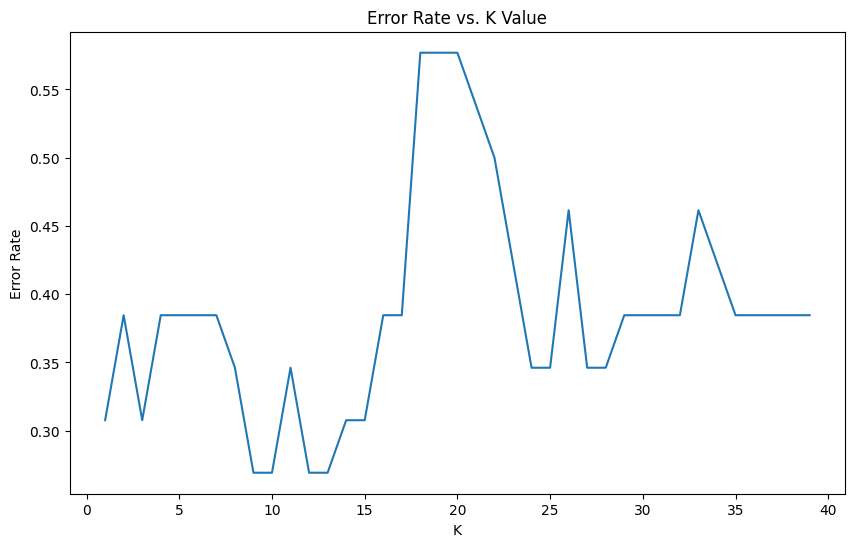

In [86]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate) #,color='blue', linestyle='dashed', marker='o',
        #markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [109]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

print('With k=10')
print('\n')
print(CM)
print(CR)

#No difference, probably due to data being small ..

With k=10


[[ 4  7]
 [ 3 12]]
              precision    recall  f1-score   support

           0       0.57      0.36      0.44        11
           1       0.63      0.80      0.71        15

    accuracy                           0.62        26
   macro avg       0.60      0.58      0.58        26
weighted avg       0.61      0.62      0.60        26



In [285]:
print('Test Accuracy Without Cross Validatoin: ', (4 + 12) / (4 + 12 + 7 + 3))

Test Accuracy Without Cross Validatoin:  0.6153846153846154


In [90]:
#Now let us try to optimize the model a bit using Cross Validation istead of just using one test data (we don't know whether
#this is a test data or a validation data sometimes, but it appears from the problem statement that this is not to be referred to
#as test data, and such it should be referred to as validation data). The idea is to split the training data into not just 80:20
# sort of arrangement and conclude results from a single test data of size 20%, instead we'll use cross validation to divide the
#training data into multiples of say 3 or 4 or 5 folds (validation sets) and loop around every fold using values of k:1-40, take
#the mean of accuracy out of all results, plot it against k range and check for optimal k value which yields greatest accuracy
#use that value in your model to get the best results

In [91]:
from sklearn.model_selection import cross_val_score

In [218]:
#This is only tuning ONE Hyper parameter (k), KNN has lots more others.
k_cv_scores = []

for k in range(1, 40):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X, y, cv =5, scoring = 'accuracy')
    k_cv_scores.append(cv_scores.mean())

In [219]:
k_cv_scores

[0.48369230769230775,
 0.5076923076923077,
 0.524,
 0.5796923076923076,
 0.5239999999999999,
 0.5633846153846154,
 0.54,
 0.5316923076923077,
 0.5249230769230769,
 0.5006153846153846,
 0.5246153846153846,
 0.5396923076923077,
 0.5243076923076924,
 0.516,
 0.5006153846153846,
 0.5319999999999999,
 0.5556923076923076,
 0.5476923076923077,
 0.5319999999999999,
 0.5636923076923077,
 0.588,
 0.5636923076923076,
 0.58,
 0.6030769230769232,
 0.5796923076923076,
 0.5483076923076923,
 0.5796923076923076,
 0.564,
 0.5633846153846154,
 0.5553846153846154,
 0.5713846153846154,
 0.5713846153846154,
 0.5713846153846154,
 0.5633846153846154,
 0.5873846153846153,
 0.5713846153846154,
 0.5633846153846154,
 0.5713846153846154,
 0.54]

Text(0, 0.5, 'k_cv_scores')

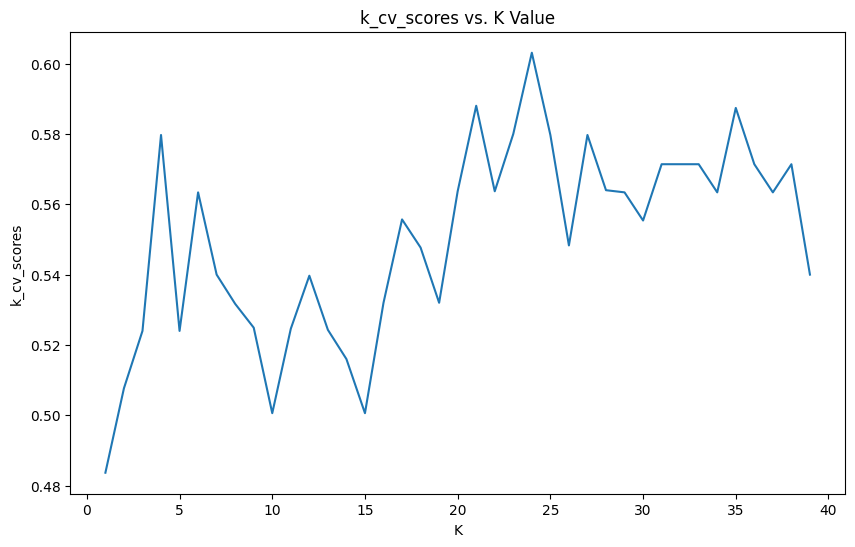

In [220]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),k_cv_scores) #,color='blue', linestyle='dashed', marker='o',
        #markerfacecolor='red', markersize=10)
plt.title('k_cv_scores vs. K Value')
plt.xlabel('K')
plt.ylabel('k_cv_scores')

In [270]:
knn2 = KNeighborsClassifier(n_neighbors=24)
cv_scores = cross_val_score(knn2, X, y, cv =5, scoring = 'accuracy')

In [271]:
print(cv_scores.mean())

0.6030769230769232


In [276]:
knn2.fit(X_train, y_train)
y_predict = knn2.predict(X_test)

In [277]:
print(confusion_matrix(y_predict,y_test) , classification_report(y_predict,y_test))

[[ 5  3]
 [ 6 12]]               precision    recall  f1-score   support

           0       0.45      0.62      0.53         8
           1       0.80      0.67      0.73        18

    accuracy                           0.65        26
   macro avg       0.63      0.65      0.63        26
weighted avg       0.69      0.65      0.67        26



In [284]:
print('Test Accuracy with Cross Validation: ', (5 + 12) / (5 + 12 + 3 + 6))

Test Accuracy with Cross Validation:  0.6538461538461539


In [ ]:
#Useful links for my reference:
#1- unedrstanding cross validation: https://towardsdatascience.com/cross-validation-using-knn-6babb6e619c8
#2- understanding knn algo: https://levelup.gitconnected.com/knn-k-nearest-neighbours-d3ce76380e14
#3- understanding knn algo 2, failure and limitations: https://levelup.gitconnected.com/knn-failure-cases-limitations-and-strategy-to-pick-right-k-45de1b986428
